In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Загрузим данные
!gdown  17ontM-tI1tjTUSxdFkoINGhXsT_airdy

df = pd.read_csv('/content/AnalyticTestData.csv')

In [6]:
# Рассмотрим образец данных

df.head()

,event_id,event_date,customer_id,is_attend,group_ids,teacher_ids,attendance_id
0,5,2020-05-22,47,1,2,6,12
1,15,2020-06-03,354,1,5,4,57
2,34,2020-06-17,183,1,5,4,158
3,22,2020-06-11,12,1,1,3,95
4,36,2020-06-19,260,1,5,4,185


In [4]:
# И общую информацию

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   event_id       320 non-null    int64 
 1   event_date     320 non-null    object
 2   customer_id    320 non-null    int64 
 3   is_attend      320 non-null    int64 
 4   group_ids      320 non-null    int64 
 5   teacher_ids    320 non-null    int64 
 6   attendance_id  320 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 17.6+ KB


In [5]:
# Преобразуем столбец с датой в нужный формат

df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')

### Посмотрим что извлечь из данных

1. Кол-во событий всего
2. Кол-во юзеров всего
3. Кол-во групп, их id
4. Кол-во учителей, их id
5. Кол-во занятий проведенных каждым учителем
6. Кол-во занятий посещенных каждым юзером
7. Кол-во пропущенных занятий для каждого юзера
8. Кол-во юзеров всего каждый день
9. Кол-во прогульщиков каждый день
10. Кол-во занятий в день
11. Retention (если можно)
12. Кол-во людей в каждой группе (по занятиям)
13. Кол-во людей в 2 и более группах (если есть)
14. Доля пропусков
15. Доля пропусков по группам (как вариант по юзерам)
16. Топ юзеров по посещаемости

In [6]:
# Посмотрим что у нас есть

total_events = df['event_id'].nunique()
total_customers = df['customer_id'].nunique()
total_groups = df['group_ids'].nunique()
group_ids = df['group_ids'].unique()
total_teacher = df['teacher_ids'].nunique()
teacher_ids = df['teacher_ids'].unique()


print(f'Количество уроков: {total_events}')
print(f'Количество учащихся: {total_customers}')
print(f'Количество групп: {total_groups}')
print(f'ID групп: {group_ids}')
print(f'Количество учителей: {total_teacher}')
print(f'ID учителей: {teacher_ids}')

Количество уроков: 62
Количество учащихся: 51
Количество групп: 4
ID групп: [2 5 1 3]
Количество учителей: 5
ID учителей: [6 4 3 5 7]


In [7]:
# Теперь нужно узнать сколько занятий провёл каждый преподваватель.
# Проверим что 1 занятие ведёт только 1 преподаватель.
# Сгруппируем по 'event_id' и 'teacher_ids' и возьмём кол-во строчек.
# Если число будет равно количеству всех занятий, то мы правы.

count_teachers = df.groupby(['event_id', 'teacher_ids'], as_index=False)\
                .count().shape[0]

print(count_teachers == total_events)

True


In [8]:
# Всё совпало. Выясним сколько уроков провёл каждый преподаватель.

teacher_events = df[['teacher_ids', 'event_id']]\
                .groupby(['teacher_ids', 'event_id'] , as_index=False)\
                .count().groupby('teacher_ids', as_index=False).count()\
                .rename(columns={'event_id': 'events_count'})

In [9]:
teacher_events

,teacher_ids,events_count
0,3,17
1,4,15
2,5,16
3,6,11
4,7,3


In [11]:
# Проверим что всё правильно, возьмём учителя с id = 3 и посчитаем его уроки.

teach3 = df[df['teacher_ids'] == 3]
teach3.groupby('event_id', as_index=False).count()\
      .groupby('event_id', as_index=False).count()\
      .shape[0]

17

Да, всё верно

In [12]:
# Разберёмся с посещениями пропусками, для начала узнаем сколько их всего
# Посчитаем долю пропущенных занятий

total_count_attends = df[df['is_attend'] == 1].shape[0]
total_count_disattends = df[df['is_attend'] == 0].shape[0]

print(f'Всего посещений: {total_count_attends}')
print(f'Всего пропусков: {total_count_disattends}')
print(f'Доля пропусков: {total_count_disattends / df.shape[0]}')


Всего посещений: 264
Всего пропусков: 56
Доля пропусков: 0.175


In [13]:
# Теперь посчитаем их для всех учащихся

customer_counts_attend_1 = df[df['is_attend'] == 1][['customer_id']]\
                           .value_counts().reset_index()\
                           .rename(columns={'count': 'count_lessons'})

customer_counts_attend_0 = df[df['is_attend'] == 0][['customer_id']]\
                           .value_counts().reset_index()\
                           .rename(columns={'count': 'missed_lessons'})


In [14]:
# Возьмём топ учащихся с кол-вом посещенных занятий >= 10

customer_counts_attend_1[customer_counts_attend_1['count_lessons'] >= 10]

,customer_id,count_lessons
0,52,16
1,12,13
2,26,13
3,354,13
4,99,12
5,401,11
6,419,11
7,192,11
8,137,10
9,452,10


In [15]:
# Посмотрим что с пропускающими занятия. Возьмём с 3 и более пропусками

customer_counts_attend_0[customer_counts_attend_0['missed_lessons'] >= 3]

,customer_id,missed_lessons
0,260,5
1,247,5
2,593,3
3,580,3
4,379,3
5,258,3
6,192,3
7,249,3


Учащиеся с id 260 и 247 - претеденты на отчисление.  
Нужно взять их на контроль.  

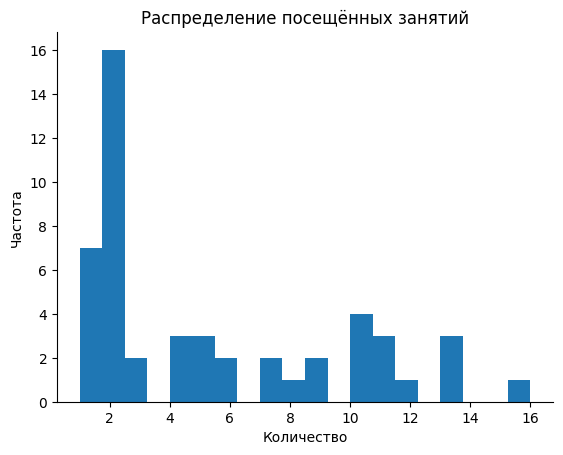

In [16]:
# построим график

customer_counts_attend_1['count_lessons'].plot(kind='hist', bins=20)
plt.title('Распределение посещённых занятий')
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
# Найдём количество учащихся в каждый день, без учёта уникальности

day_customers = df[df['is_attend'] == 1][['event_date', 'customer_id']]\
                .groupby('event_date', as_index=False).count()\
                .rename(columns={'customer_id': 'count'})


Text(0, 0.5, 'Количество')

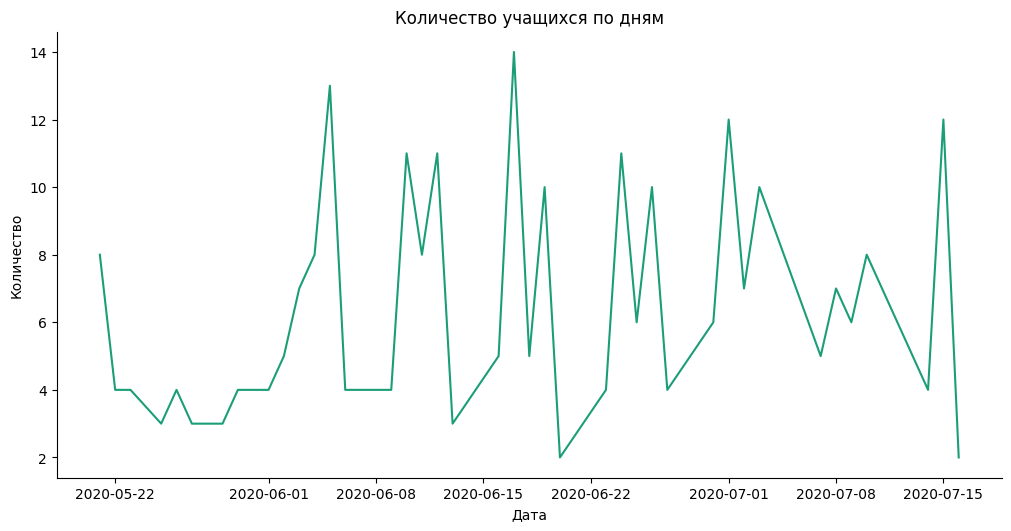

In [18]:

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['event_date']
    ys = series['count']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = day_customers.sort_values('event_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Количество учащихся по дням')
plt.xlabel('Дата')
plt.ylabel('Количество')

Теперь рассчитаем метрики активности - DAU, WAU, MAU  

In [19]:
dau = df[df['is_attend'] == 1][['event_date', 'customer_id']]\
      .groupby('event_date', as_index=False).nunique()\
      .rename(columns={'customer_id': 'count_unique_customers'})


Text(0, 0.5, 'Количество уникальных учащихся')

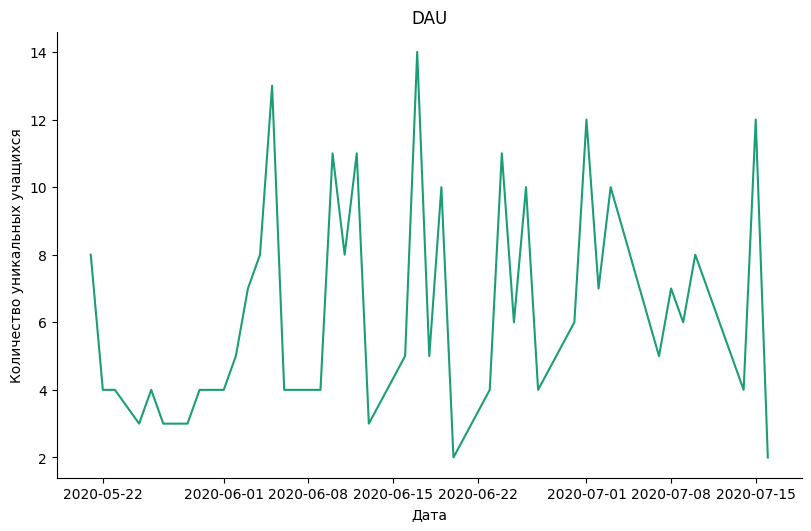

In [20]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['event_date']
    ys = series['count_unique_customers']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 5.2), layout='constrained')
df_sorted = dau.sort_values('event_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('DAU')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных учащихся')

In [21]:
wau = df[:]
wau['week'] = wau['event_date'].dt.strftime('%W').astype(int)

wau = wau[wau['is_attend'] == 1][['week', 'customer_id']]\
        .groupby('week', as_index=False)\
        .nunique().rename(columns={'cusomer_id': 'uniqe_in_week'})

wau

<ipython-input-21-3a60e61fc816>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wau['week'] = wau['event_date'].dt.strftime('%W').astype(int)


,week,customer_id
0,20,12
1,21,15
2,22,23
3,23,22
4,24,21
5,25,20
6,26,20
7,27,16
8,28,16


Text(0, 0.5, 'Количество уникальных учащихся')

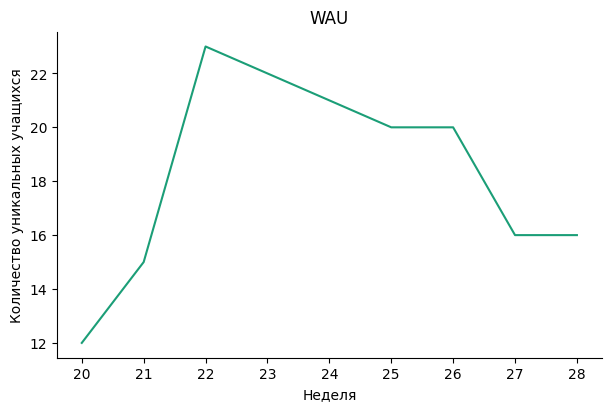

In [22]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['week']
    ys = series['customer_id']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
df_sorted = wau.sort_values('week', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('WAU')
plt.xlabel('Неделя')
plt.ylabel('Количество уникальных учащихся')

In [23]:
mau = df[:]
mau['event_date'] = df['event_date'].dt.strftime('%Y-%m')

mau = mau[mau['is_attend'] == 1][['event_date', 'customer_id']]\
        .groupby('event_date', as_index=False)\
        .nunique().rename(columns={'customer_id': 'unique_customers',
                                 'event_date':'month'})

mau

,month,unique_customers
0,2020-05,18
1,2020-06,40
2,2020-07,23


Text(0, 0.5, 'Количество уникальных учащихся')

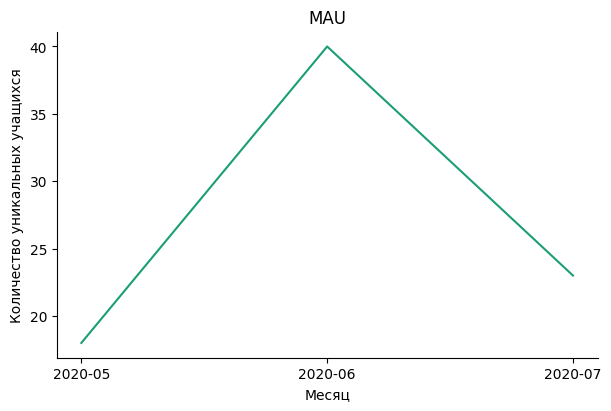

In [41]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['month']
    ys = series['unique_customers']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
df_sorted = mau.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('MAU')
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных учащихся')

Text(0, 0.5, 'Количество')

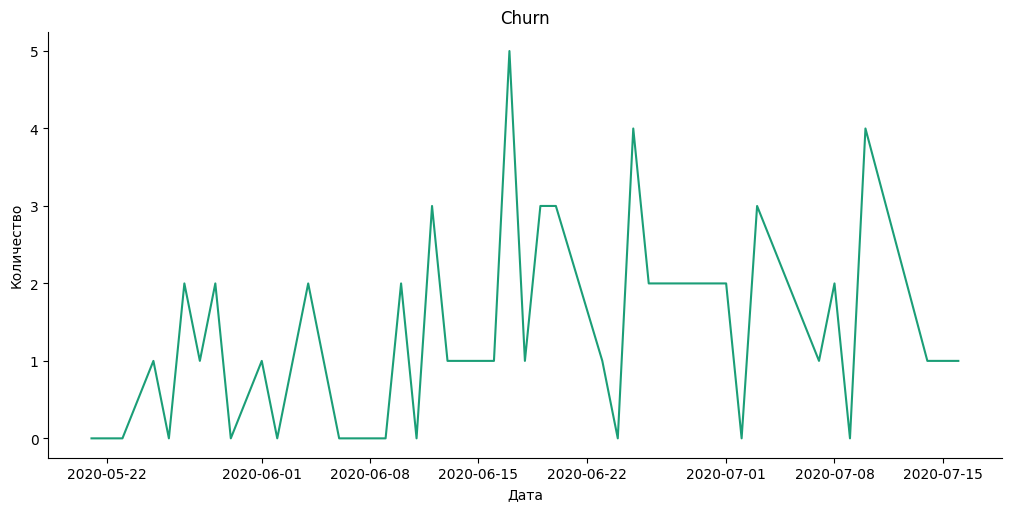

In [43]:
# Построим график прогулов

df_churn = df[df['is_attend'] == 0][:].groupby('event_date', as_index=False)\
            .count()[['event_date', 'customer_id']]\
            .rename(columns={'event_date': 'date', 'customer_id': 'count'})

dates = df[['event_date']]

dates_churn = dates.merge(df_churn, how='left', left_on='event_date', right_on='date')
dates_churn = dates_churn.drop('date', axis=1).fillna(0)

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['event_date']
    ys = series['count']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
df_sorted = dates_churn.sort_values('event_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Churn')
plt.xlabel('Дата')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

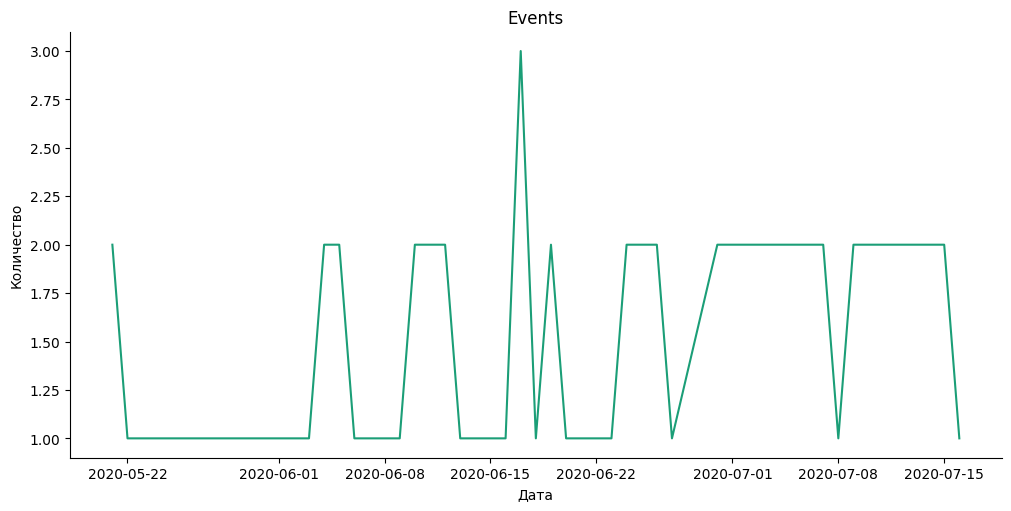

In [45]:
# Построим график событий

count_events_by_day = df[['event_id', 'event_date']]\
                        .drop_duplicates()\
                        .groupby('event_date', as_index=False)\
                        .count().rename(columns={'event_id': 'event_counts'})

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['event_date']
    ys = series['event_counts']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
df_sorted = count_events_by_day.sort_values('event_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Events')
plt.xlabel('Дата')
plt.ylabel('Количество')

In [29]:
# Retention для 4 групп. Какие тут есть проблемы:
# не знаем когда юзеры пришли в группы и могли ли добавляться новые
# Как вариант мы можем посмотреть изменение кол-ва юзеров внутри групп

# Выделим группы

group_1 = df[df['group_ids'] == 1][:]
group_2 = df[df['group_ids'] == 2][:]
group_3 = df[df['group_ids'] == 3][:]
group_5 = df[df['group_ids'] == 5][:]

# Создадим функцию для группировки и подсчёта

def get_count_customers(df: pd.DataFrame) -> pd.DataFrame:
    return df.groupby('event_date', as_index=False)\
             .count()[['event_date', 'customer_id']]\
             .rename(columns={'customer_id': 'count_customers'})

# Создадим датайреймы для групп

count_cust_gr_1 = get_count_customers(group_1)
count_cust_gr_2 = get_count_customers(group_2)
count_cust_gr_3 = get_count_customers(group_3)
count_cust_gr_5 = get_count_customers(group_5)


Text(0, 0.5, 'Количество')

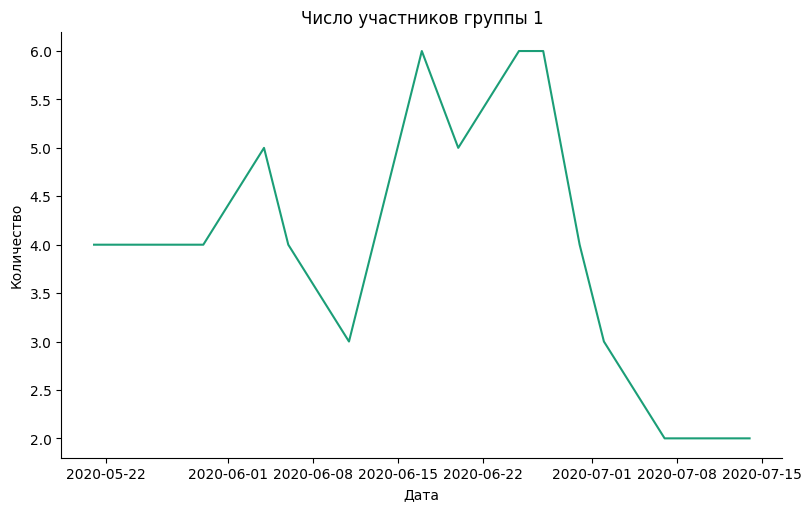

In [53]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['event_date']
    ys = series['count_customers']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
df_sorted = count_cust_gr_1.sort_values('event_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Число участников группы 1')
plt.xlabel('Дата')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

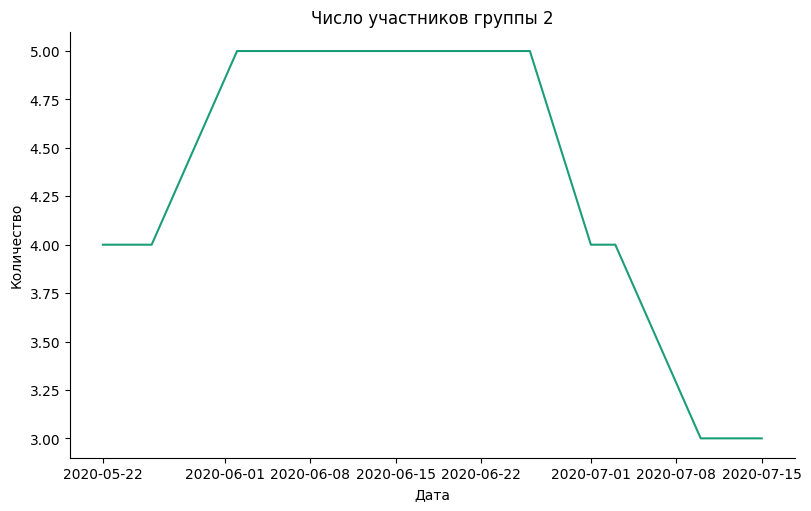

In [54]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['event_date']
    ys = series['count_customers']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
df_sorted = count_cust_gr_2.sort_values('event_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Число участников группы 2')
plt.xlabel('Дата')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

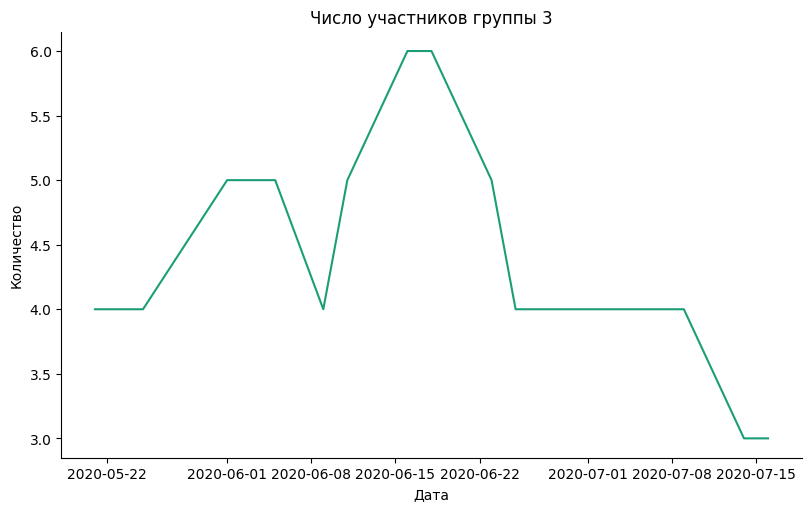

In [55]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['event_date']
    ys = series['count_customers']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
df_sorted = count_cust_gr_3.sort_values('event_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Число участников группы 3')
plt.xlabel('Дата')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

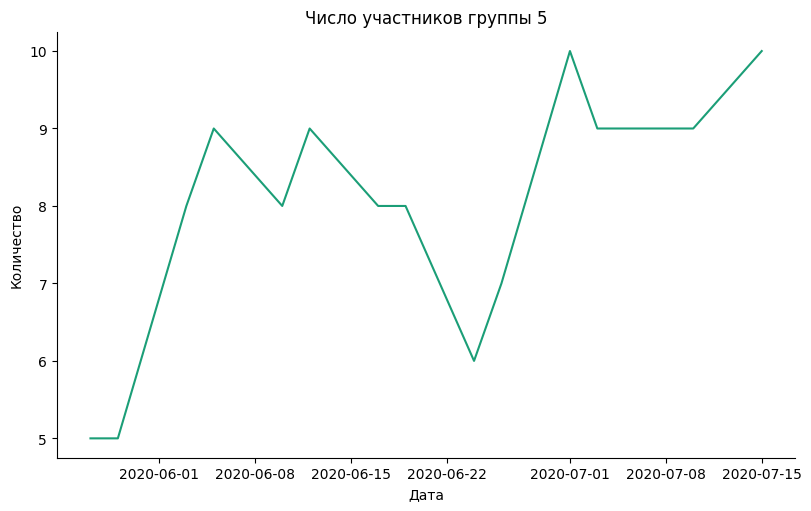

In [59]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['event_date']
    ys = series['count_customers']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
df_sorted = count_cust_gr_5.sort_values('event_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Число участников группы 5')
plt.xlabel('Дата')
plt.ylabel('Количество')

Выводы:  
1. Кол-во участников в группах изменяется во времени  
   В 1,2,3 группах общее число участников снизилось к июлю.  
   В 5 группе оно возрасло.  
   Стоит отметить что мы учитывали общее количество учащихся, без фильтрации по посещаемости.
2. Причина изменений не особо ясна, без понимания природы данных.

In [36]:
# Узнаем состоит ли кто в 2 или более группах

users_in_2_gr = df[['customer_id', 'group_ids']]\
                .groupby(['customer_id','group_ids'], as_index=False)\
                .count().groupby('customer_id', as_index=False).count()\
                .rename(columns={'group_ids':'count_group'})

users_in_2_gr[users_in_2_gr['count_group']>=2]

,customer_id,count_group
2,26,2


In [61]:
df.head()

,event_id,event_date,customer_id,is_attend,group_ids,teacher_ids,attendance_id
0,5,2020-05-22,47,1,2,6,12
1,15,2020-06-03,354,1,5,4,57
2,34,2020-06-17,183,1,5,4,158
3,22,2020-06-11,12,1,1,3,95
4,36,2020-06-19,260,1,5,4,185


In [67]:
# Ну и посчитаем среднюю посещаемость

avg_attend = df.loc[df['is_attend'] == 1]\
               .groupby(['event_date', 'event_id'], as_index=False)\
                ['customer_id'].count()\
               .groupby('event_date', as_index=False)\
               .mean().rename(columns={'customer_id': 'avg_customer'})\
               [['event_date', 'avg_customer']].round(2)

avg_attend

,event_date,avg_customer
0,2020-05-21,4.00
1,2020-05-22,4.00
2,2020-05-23,4.00
3,2020-05-25,3.00
4,2020-05-26,4.00
5,2020-05-27,3.00
6,2020-05-28,3.00
7,2020-05-29,3.00
8,2020-05-30,4.00
9,2020-06-01,4.00


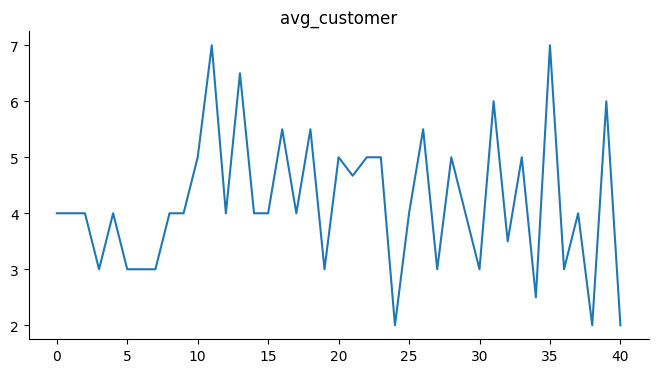

In [69]:
avg_attend['avg_customer'].plot(kind='line', figsize=(8, 5.2), title='Среднее число учащихся')
plt.gca().spines[['top', 'right']].set_visible(False)


In [70]:
df['event_date'].nunique()

41